In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


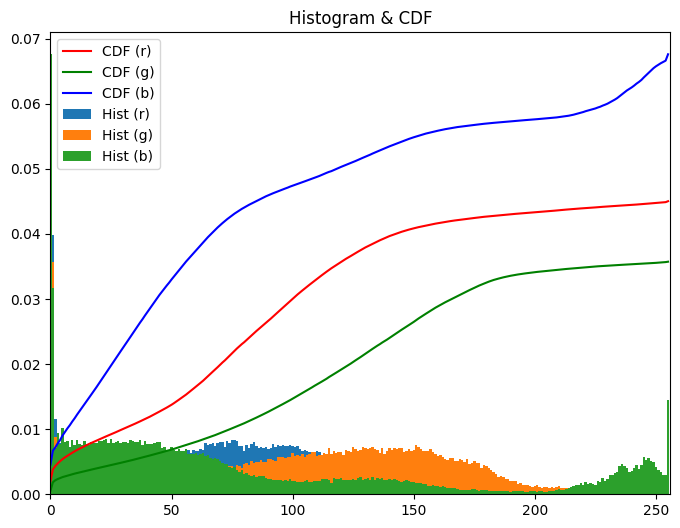

/usr/local/lib/python3.11/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


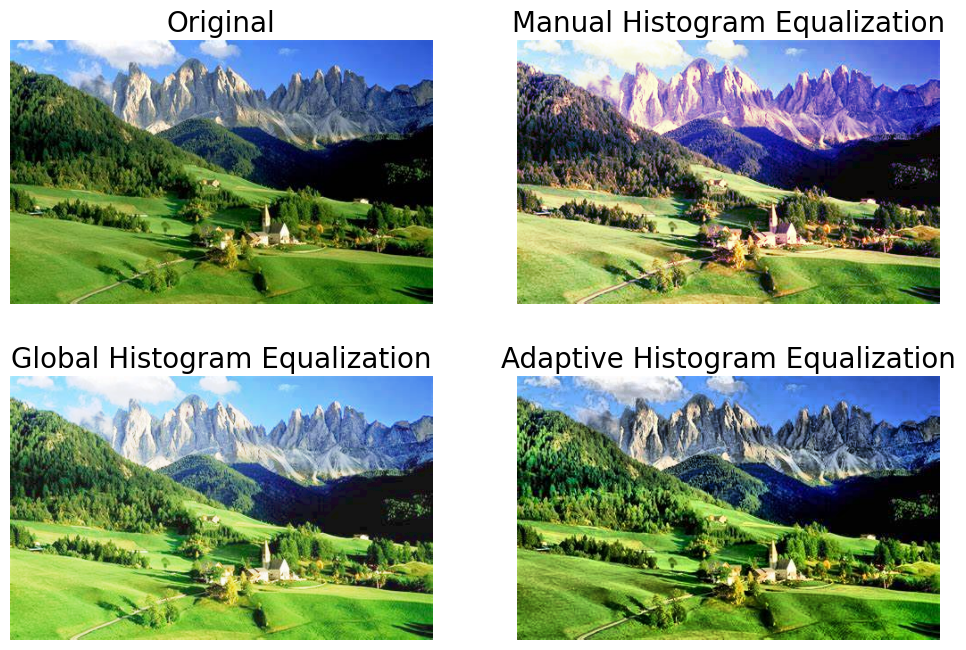

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
from skimage.exposure import equalize_hist, equalize_adapthist

def plot_image(image, title):
    plt.imshow(image)
    plt.title(title, size=20)
    plt.axis('off')

def plot_hist(img):
    colors = ['r', 'g', 'b']
    cdf = np.zeros((256, 3))

    for i in range(3):
        hist, bins = np.histogram(img[..., i].flatten(), 256, [0, 256], density=True)
        cdf[..., i] = hist.cumsum()
        cdf_normalized = cdf[..., i] * hist.max() / cdf.max()

        plt.plot(cdf_normalized, color=colors[i], label=f'CDF ({colors[i]})')
        bin_width = bins[1] - bins[0]
        plt.bar(bins[:-1], hist * bin_width, bin_width, label=f'Hist ({colors[i]})')

    plt.xlim([0, 256])
    plt.legend(loc='upper left')
    return cdf

img = imread('/content/drive/MyDrive/images/pegunungan.jpg')

plt.figure(figsize=(8, 6))
plt.title("Histogram & CDF")
cdf = plot_hist(img)
plt.show()

img2 = np.copy(img)
for i in range(3):
    cdf_m = np.ma.masked_equal(cdf[..., i], 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf2 = np.ma.filled(cdf_m, 0).astype('uint8')
    img2[..., i] = cdf2[img[..., i]]

equ1 = (255 * equalize_hist(img)).astype(np.uint8)
equ2 = (255 * equalize_adapthist(img)).astype(np.uint8)

# Menampilkan hasil
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plot_image(img, "Original")

plt.subplot(2, 2, 2)
plot_image(img2, "Manual Histogram Equalization")

plt.subplot(2, 2, 3)
plot_image(equ1, "Global Histogram Equalization")

plt.subplot(2, 2, 4)
plot_image(equ2, "Adaptive Histogram Equalization")

plt.show()